In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [3]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [4]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [5]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [6]:
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

Updating data for LIFW...


[*********************100%%**********************]  1 of 1 completed

Data for LIFW updated in data\LIFW.csv.
Updating data for SRL...


[*********************100%%**********************]  1 of 1 completed

Data for SRL updated in data\SRL.csv.
Updating data for SLAMW...


KeyboardInterrupt: 

In [7]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [8]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [9]:
from backtest_utils import TradingSimulator
start_date = '2018-01-01'
end_date = '2020-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 5
portfolio_starting_value = 110000
risk_pct = 0.1
reinvest_profits_bool = False

# Run the backtest
TS_no_leverage = TradingSimulator(strategy_name)
test_no_leverage = TS_no_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=1.0, save_test=True)
TS_leverage = TradingSimulator(strategy_name)
test_w_leverage = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=5.0, save_test=True)



NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 30.28it/s, Profit=-3171.05]


Backtest results saved to backtests/Test_19.pkl
NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2018-11-12 - 2018-11-26:  29%|██████▎               | 21/73 [00:00<00:01, 31.23it/s, Profit=-1.89e+4]

Backtest results saved to backtests/Test_20.pkl


In [10]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests

In [84]:
no_leverage_analyzer = BacktestAnalyzer(test_no_leverage)
leveraged_analyzer = BacktestAnalyzer(test_w_leverage)

total_comparison, long_comparison, short_comparison, no_leverage_analysis, leveraged_analysis = (
    compare_two_backtests(no_leverage_analyzer, leveraged_analyzer)
)

from IPython.display import display, HTML
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

display(total_comparison)
display(long_comparison)
display(short_comparison)

backtests/Test_1_analysis.pkl
Backtest analysis saved to backtests/Test_1_analysis.pkl
backtests/Test_2_analysis.pkl
Backtest analysis saved to backtests/Test_2_analysis.pkl


lst                                           total                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                          -0.05                   -0.20
max_drawdown                                  -0.59                   -0.75
win_rate                                       0.26                    0.27
loss_rate                                      0.74                    0.73
pct_up_bets                                    0.42                    0.43
pct_down_bets                                  0.57                    0.57
median_gain_to_average_loss                   -0.51                   -0.75
profit_factor                                  0.35                    0.35
sharpe_ratio                                  -2.10                   -2.14
beta                                           0.29                    1.43
sortino_ratio                                 -2.33                   -2.33
test_score                                     0.88                    0.54

lst                                            long                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                          -0.01                   -0.05
max_drawdown                                  -0.41                   -0.58
win_rate                                       0.36                    0.32
loss_rate                                      0.64                    0.68
pct_up_bets                                    0.48                    0.45
pct_down_bets                                  0.52                    0.55
median_gain_to_average_loss                   -0.74                   -1.01
profit_factor                                  0.58                    0.60
sharpe_ratio                                  -0.97                   -0.95
beta                                           0.39                    1.88
sortino_ratio                                 -1.29                   -1.28
test_score                                     0.75                    0.73

lst                                           short                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                          -0.01                   -0.06
max_drawdown                                  -0.35                   -0.39
win_rate                                       0.25                    0.23
loss_rate                                      0.75                    0.77
pct_up_bets                                    0.32                    0.39
pct_down_bets                                  0.68                    0.61
median_gain_to_average_loss                   -0.21                   -0.40
profit_factor                                  0.14                    0.17
sharpe_ratio                                  -3.92                   -3.54
beta                                          -0.10                   -0.48
sortino_ratio                                 -3.37                   -3.10
test_score                                     0.70                    0.07

In [85]:
benchmark_returns = TS.get_benchmark_returns(start_date_dt, end_date_dt, test_no_leverage['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

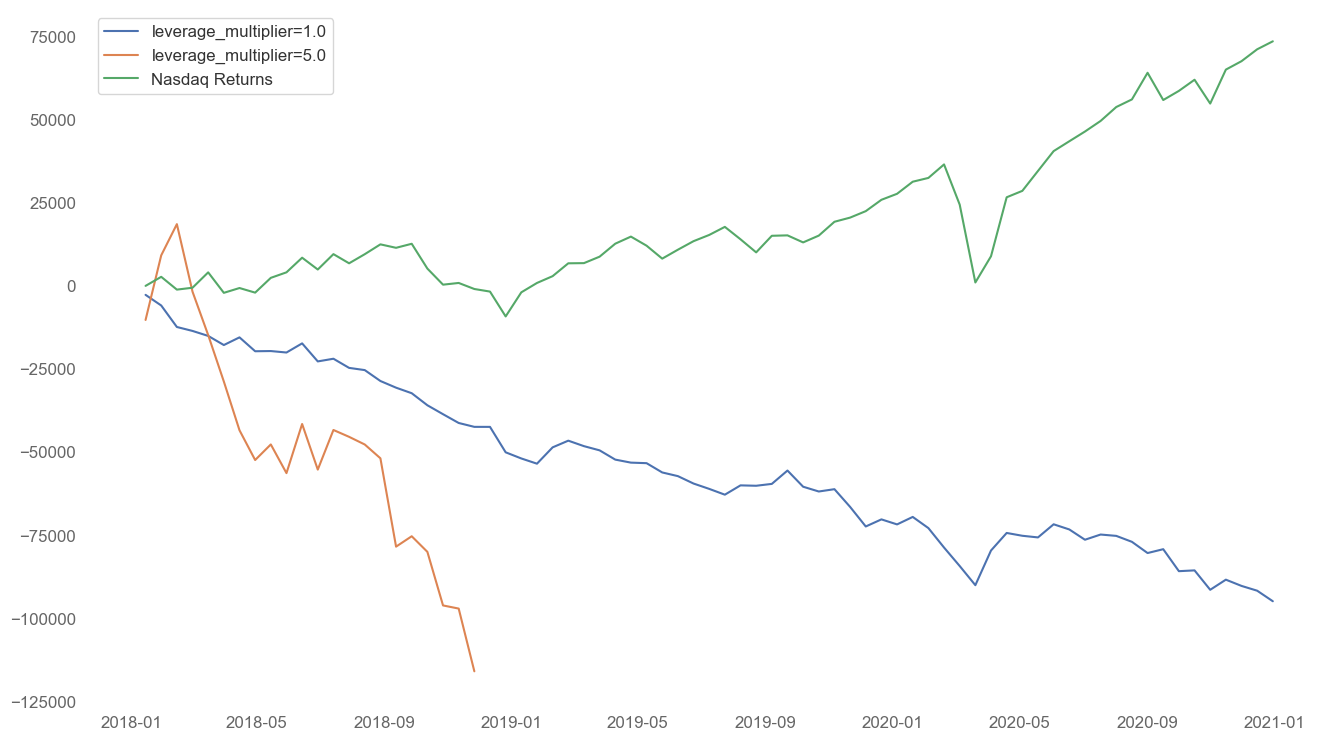

In [86]:
# Plot the backtest profits and the benchmark_data
plt.figure(figsize=(16, 9))
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(test_no_leverage['backtest_profits']), label=total_comparison.columns[0][1])
plt.plot(np.array(test_w_leverage['rebalance_periods'])[:, 1], np.cumsum(test_w_leverage['backtest_profits']), label=total_comparison.columns[1][1])
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')

plt.grid()
# Show labels
plt.legend()
# Show the plot
plt.show()